# Домашняя работа №2

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as sts
%matplotlib inline

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

<span style="color:blue">*Генеральная совокупность - это совокупность всех объектов, относительно которых мы будем делать выводы, а выборка -  это случайно выбранные объекты из генеральной совокупности для анализа.*</span>


- Если размер выборки больше 200, то такая выборка является репрезентативной?

<span style="color:blue">*Для локальных исследований скорее всего будет считаться, а если анализируем что-то глобальное, то скорее всего нет*</span>

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

<span style="color:blue">1) *Все игроки сборных, участвующих в турнире ЧМ-2018*  
2) *Все игроки сборной Франции, когда-либо принимавшие участие в чемпионатах мира*  
3) *Игроки старше 30 лет, когда-либо принимавшие участие в чемпионатах мира*</span>

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

<span style="color:blue">1) *Выборка веса детей, родившихся в определенном микрорайоне Волгограда  
2) Выборка веса детей в зависимости от роддома с определенным интервалом значений веса*</span>

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


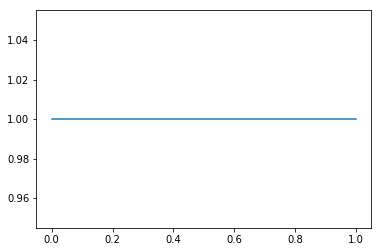

In [2]:
# по определению: Мо́да — значение во множестве наблюдений, которое встречается наиболее часто. На графике ниже мы
# видим, что таких значений нет.
uniform_rv = sts.uniform()
uniform_rv.rvs(10)

x = np.linspace(0, 1, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [3]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()


#your code here
overshoot = np.array([10,7,55])
sample_with_overshoot = list(overshoot)+ list(sample)
new_med =np.array(sorted(sample_with_overshoot)[len(sample_with_overshoot)//2])
new_mean =np.array(sample_with_overshoot).mean()
print('Median = {}'.format(med))
print('MathExpectation = {}'.format(mean))
print('NewMedian = {}'.format(new_med))
print('NewMathExpectation = {}'.format(new_mean))
print('Как мы видим из результатов более неустойчивой статистикой является матожидание ')

Median = 3.9139276629026103
MathExpectation = 4.176145685402571
NewMedian = 4.379515556150568
NewMathExpectation = 5.277470925102428
Как мы видим из результатов более неустойчивой статистикой является матожидание 


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

<span style="color:blue">1) *Изменится на +$C$ и х$C$* </span>

In [4]:
#mu = 2
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = np.array(sorted(sample)[len(sample)//2])
sum_p = sample + C
mean_with_c = np.array(sorted(sum_p)[len(sample)//2])
mult_p = sample * C
mean_mult_c = np.array(sorted(mult_p)[len(sample)//2])
print('матожидание = {}'.format(mean))
print('матожидание + C = {}'.format(mean_with_c))
print('матожидание x C = {}'.format(mean_mult_c))


матожидание = 2
матожидание + C = 2.5
матожидание x C = 1.0


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

<span style="color:blue"> *Увеличится. Шапка станет шире* </span>

In [5]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()
print('дисперсия без выбросов {}'.format(var))

#your code here
overshoot = np.array([2,6,3,6])
sample_with_overshoot = np.array(list(overshoot) + list(sample))
new_var = sample_with_overshoot.var()
print('дисперсия c выбросом {}'.format(new_var))

дисперсия без выбросов 0.8610906362936087
дисперсия c выбросом 1.0803685418646347


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [6]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)

s = sample.var()
mean = sample.mean()

x_left = mean - s
x_right = mean + s

print('(X - s,X + s) = {0}, {1}'.format(x_left,x_right))
p_75 = np.percentile(sample, 75)
p_25 = np.percentile(sample, 25)
iqr = p_75 - p_25
print ('Интерквантильный размах = {0} - {1} = {2}'.format(p_75,p_25,iqr))

#Шире (X - s,X + s)

(X - s,X + s) = 2.029718369807358, 3.947204553738377
Интерквантильный размах = 3.6900021337303883 - 2.2910608401944774 = 1.398941293535911


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

<span style="color:blue">*Статистика - набор данных, позволяющих нам понять какая будет модель. Статистика - любая функция от тех данных, которые у нас есть* </span>

In [7]:
beta_rv = stats.beta(1,3)
#your code here    
a = 1
b = 3
var = (a * b)/((a+b)**2*(a+b+1))
print('Дисперсия = {}'.format(var))

Дисперсия = 0.0375


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

<span style="color:blue">*Выборки случайных величин (их значения)* </span>

In [8]:
gamma_rv = stats.gamma(2,2)
#your code here
k = 2
theta = 2
mean = k * theta
var = k*theta**2
gamma_rvs = gamma_rv.rvs(10)
med = np.array(sorted(gamma_rvs)[len(gamma_rvs)//2])
print ('Матожидание = {}'.format(mean))
print ('Дисперсия = {}'.format(var))
print ('Медина = {}'.format(med))

Матожидание = 4
Дисперсия = 8
Медина = 3.0552104643353273


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

<span style="color:blue">*Нормальное* </span>  
<span style="color:blue">*ЦПТ примет вид:* </span>
$$\bar{X_n} \rightarrow^d \mathcal{N}(M,SE^2)$$

Text(0.5, 0, '$x$')

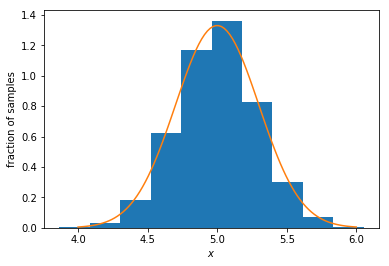

In [9]:
#your code here
results = []
norm_rv = stats.norm(5,2)
n = 50
for i in range(10000):
    sample = norm_rv.rvs(n)
    #your code here
    results.append(sample.mean())
rv = stats.norm(5,.3)    
x = np.linspace(4,6,100)    
plt.hist(results, density=True)
plt.plot(x, rv.pdf(x))
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
#  методом подбора подобрал параметры норамального распределения, так вообще делают?:)

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Text(0.5, 0, '$x$')

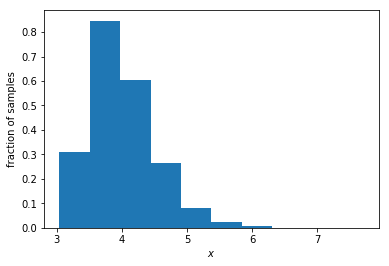

In [10]:
#your code here
results = []
n = 4
exp_rv = sts.expon(3)
for i in range(10000):
    x = exp_rv.rvs(n)
    results.append(x.mean())

plt.hist(results, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
# достаточно уменьшить количество выборки

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [11]:
expon_rv = stats.expon(3)
n = 4
sample = expon_rv.rvs(n) 
mean_x = sum(sample)/n
# s - выборочная дисперсия
s = np.sum([(sample[i] - mean_x)**2 for i in range(len(sample))])*1/(n-1)
# z-оценка для первого элемента из выборки
z = (sample[0] - mean_x)/s**.5
# z_m -  среднее выборочное
z_m = sum(sample)/n - mean_x
# Что-то я тут совсем запутался..как я понял мы можем нормировать и центрировать любую случайнуюю величину из выборки
# и потом оценивать эту величину относительно z -  Если z<0, то x (величина) ниже матожидания,
# если z>0, то x расположен выше матожидания.
# а как вот потом работать с этим (считать новое матожидание и дисперсию) - беда
# пересмотрел лекцию третью - почему матожидание 0 получается попробовал изобразить в z_m
# с дисперсией как не крутил , единицу получить не смог, хотя в доказательстве из лекции
# все предельно ясно. 
# еще я пробовал найти z для всех величин из выборки, т.е. получить список [z1,z2,...zn]
# и уже для этой выборки найти дисперсию и среднее , но не получается 1 и 0...
# или я сильно мудрю и делаю что-то совсем не так и ответ на поверхности , или я не понимаю сути..


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [12]:
chi2_rv = stats.chi2(10)
chi2_rv.ppf(.9)
sample = chi2_rv.rvs(16)
results = []
n = 40
for i in range(50):
    x = chi2_rv.rvs(n)
    results.append(x.mean())
# преобразуем results в np array для расчетов
f = np.array(results)
# потом для 90% смотрим значение коэф http://statsoft.ru/home/textbook/modules/sttable.html#chi. коэф. = 1,6
# из slack не понял как его получили 10+-1,6*se
s = f.var()
se = (s/len(f))**0.5
# доверительный интервал 90%
x_left = f.mean() - 1.6*se
x_right = f.mean() + 1.6*se
print(f"Доверительный интервал = ({x_left}, {x_right})")
print(f"Доверительный интервал на разборе = ({0}, {chi2_rv.ppf(.9)})")

# что-то у меня не то , наверно, вышло

Доверительный интервал = (9.665576577764666, 9.968487003106423)
Доверительный интервал на разборе = (0, 15.987179172105263)


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

1.3406056078504547
1.7530503556925547


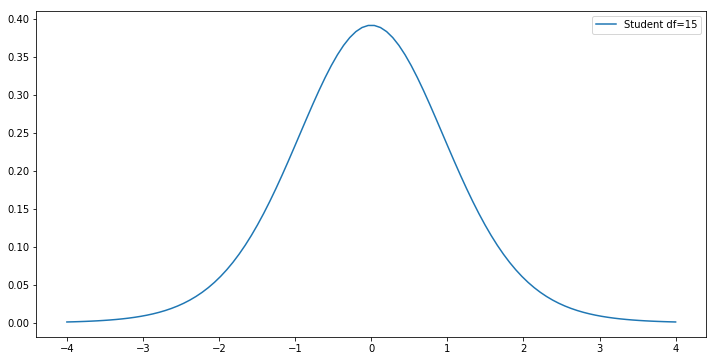

In [13]:
#your code here
# для себя визуализирую 
t_rv = sts.t(15)
x = np.linspace(-4, 4, 100)
plt.figure(figsize=(12,6))

pdf = t_rv.pdf(x)
plt.plot(x, pdf)

plt.legend(['Student df=15'])

# Шире 95% , если брать lower tail
print (t_rv.ppf(.9))
print (t_rv.ppf(.95))

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [14]:
norm_rv = stats.norm(0, 2)
#your code here
norm_rvs_1 = norm_rv.rvs(30)
norm_rvs_2 = norm_rv.rvs(60)
mean_1 = norm_rvs_1.mean()
var_1 = norm_rvs_1.var()
mean_2 = norm_rvs_2.mean()
var_2 = norm_rvs_2.var()

se_1 = (var_1/len(norm_rvs_1))**0.5
se_2 = (var_2/len(norm_rvs_2))**0.5

x1_left = mean_1 - 1.6*se_1
x1_right = mean_1 + 1.6*se_1

x2_left = mean_2 - 1.6*se_2
x2_right = mean_2 + 1.6*se_2
print(x1_left,x1_right)
print(x2_left,x2_right)
# 2-ой ДИ уже из-за того , что разброс будет меньше

-0.11001542326054292 0.9660767928857595
-0.29931365277687755 0.5032473311612551


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

<span style="color:blue">*Второго рода (неверная гипотеза  𝐻0 была принята)* </span>


#### Какие рассуждения относительно p-value верные?

- Если p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


<span style="color:blue">*1) неверно  
    2) нет, это означает только, что данную гипотезу нельзя отвергать  
    3) нет, в любом случае надо проверять, если будет удовлетоврять условию принятия гипотезы* </span>

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

<span style="color:blue">*1) Т.к. принято считать, что при $p < 0.05$ гипотезу $H_0$ стоит отвергать, то буду использовать 0.05  
    2) Да, т.к. чем ближе к единице, тем точнее оценка. 0,99 означает, что мы не берем во внимание появление события ,вероятность которого меньше 1-0,99=0,01.* </span>



In [15]:
#your answer here

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

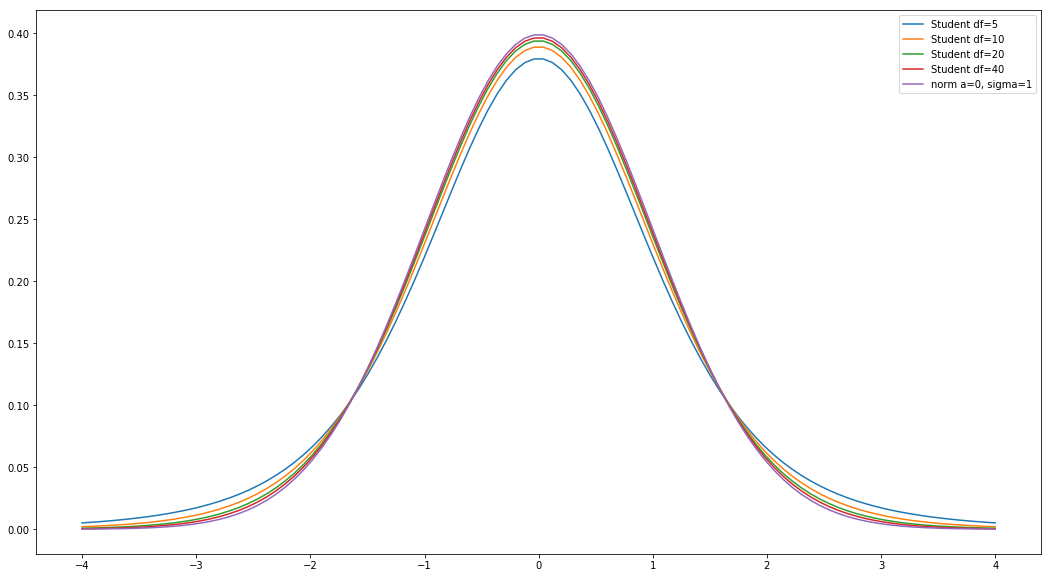

In [16]:
#your code here
t_rv = sts.t(5)
t_rv_2 = sts.t(10)
t_rv_3 = sts.t(20)
t_rv_4 = sts.t(40)
norm_rv = sts.norm(0, 1)

x = np.linspace(-4, 4, 100)

plt.figure(figsize=(18,10))

pdf = t_rv.pdf(x)
plt.plot(x, pdf)

pdf_2 = t_rv_2.pdf(x)
plt.plot(x, pdf_2)

pdf_3 = t_rv_3.pdf(x)
plt.plot(x, pdf_3)

pdf_4 = t_rv_4.pdf(x)
plt.plot(x, pdf_4)

pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_norm)

plt.legend(['Student df=5', 'Student df=10', 'Student df=20', 'Student df=40','norm a=0, sigma=1'])

# чем выше степень свободы, тем график плотности ближе к нормальному распределению, т.е. чем меньше  df , тем больше
# выбросов

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [17]:
#your code here


<span style="color:blue">*Сначала , вроде смог осилить , чтобы корреляция 0 была  
    но потом сделал перерыв, посмотрел еще раз на код и понял, что какая-то ерунда..  
    прочитал много материала про корреляцию и методику получения, потратил много времени , а реализвать  ,
    увы, что требовалось, не смог* </span> 

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

-0.14545454545454542


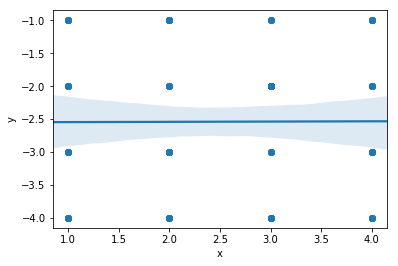

In [19]:
#your code here
n = 100

df = pd.DataFrame()


df['x'] = np.random.choice([1, 2, 3, 4], n)
df['y'] = np.random.choice([1, 2, 3, 4], n)*-1

u = np.random.choice([1, 2, 3, 4], n)
v = np.random.choice([1, 2, 3, 4], n)*-1

mean_u = sum(u)/n
mean_v = sum(v)/n
# если случайные величины X и Y независимы но ковариация равна 0
cor = sum([(u[i] - mean_u) * (v[i] - mean_v) for i in range(n)])/(n-1)
# Ковариация cov ~0
print(cor)
sns.regplot(x="x", y="y", data=df)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [20]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here
# сортировка, ранжирование
data = list(enumerate(sorted(sample)))
sum_sample_1 = 0
sum_sample_2 = 0
# сумма рангов каждой выборки
for i in data:
    if i[1] in sample_1:
        sum_sample_1+= i[0]
    else:
        sum_sample_2+= i[0]
print(sum_sample_1,sum_sample_2)        

9633 10267
